In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
df=pd.read_csv(r"telecomes.csv")

In [3]:
df.info()  #provides the meta data info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#coverting the categorical values, Male -> 1, Female -> 0
df['gender'].replace({'Male' : 1, 'Female': 0}, inplace=True)

In [6]:
dict = {'Yes' : 1, 'No': 0}

In [7]:
df['Partner'].replace(dict, inplace=True)

In [8]:
df['Dependents'].replace(dict, inplace=True)

In [9]:
df['PhoneService'].replace(dict, inplace=True)

In [10]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
dict1 = {'Yes' : 1, 'No': 0, 'No internet service':2}

In [12]:
df['OnlineSecurity'].replace(dict1, inplace=True)
# df['OnlineSecurity'].unique()

In [13]:
df['OnlineBackup'].replace(dict1, inplace=True)
# df['OnlineBackup'].unique()

In [14]:
df['DeviceProtection'].replace(dict1, inplace=True)
# df['DeviceProtection'].unique()

In [15]:
df['TechSupport'].replace(dict1, inplace=True)

In [16]:
df['StreamingTV'].replace(dict1, inplace=True)

In [17]:
df['StreamingMovies'].replace(dict1, inplace=True)

In [18]:
df['PaperlessBilling'].replace(dict, inplace=True)

In [19]:
df["MultipleLines"].unique()  #get the unique values of the MultipleLines Col.

array(['No phone service', 'No', 'Yes'], dtype=object)

In [20]:
df['MultipleLines'].replace({'Yes' : 1, 'No': 0, 'No phone service':2}, inplace=True)

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [22]:
df['Contract'].replace({'Month-to-month' : 0, 'One year': 1, 'Two year':2}, inplace=True)

In [23]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
x=list(pd.unique(df['PaymentMethod']))

code={}
p=0
for i in x:
    code[i]=p
    p+=1
    
def coder(y):
    return code[y]

df['PaymentMethod']=df['PaymentMethod'].apply(coder)

In [25]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
x=list(pd.unique(df['InternetService']))

code={}
p=0
for i in x:
    code[i]=p
    p+=1
    
def coder(y):
    return code[y]

df['InternetService']=df['InternetService'].apply(coder)

In [27]:
df['Churn'].replace(dict, inplace=True)

In [28]:
#convert the object type into the float type and and values are matching with any char simply replaced with NaN values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

In [29]:
df.drop('customerID', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [31]:
# Calculate correlations
correlations = df.corr()['Churn'].drop('Churn')

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

print(sorted_correlations)


Contract            0.396150
tenure              0.354049
OnlineSecurity      0.332443
TechSupport         0.329474
OnlineBackup        0.291047
DeviceProtection    0.281048
PaymentMethod       0.262918
StreamingMovies     0.207150
StreamingTV         0.205246
TotalCharges        0.199484
MonthlyCharges      0.192858
PaperlessBilling    0.191454
Dependents          0.163128
SeniorCitizen       0.150541
Partner             0.149982
InternetService     0.047097
MultipleLines       0.019609
PhoneService        0.011691
gender              0.008545
Name: Churn, dtype: float64


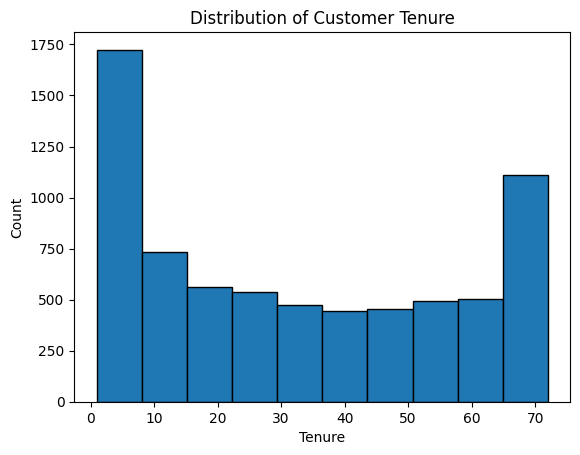

In [32]:
# Visualize the distribution of customer tenure, which is the number of months a customer has been with the company.
plt.hist(df['tenure'], bins=10,edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')
plt.show()


In [33]:
selected_features = ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'StreamingMovies', 'StreamingTV']

In [34]:
X = df[selected_features]
y = df['Churn']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape

(1407, 9)

In [36]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
model=clf.predict(X_test)
model.shape

(1407,)

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,model))

Accuracy: 0.7398720682302772


In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from six import StringIO
import sys

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = selected_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.463872 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.463872 to fit



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rdModel= RandomForestClassifier()

In [41]:
rdModel.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
pr=rdModel.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test,pr))
print("precision:",metrics.precision_score(y_test,pr))
print("recall:",metrics.recall_score(y_test,pr))
print("f1 score:",metrics.f1_score(y_test,pr))
print("precision:",metrics.sensitivity(y_test,pr))

Accuracy: 0.7526652452025586
precision: 0.5373563218390804
recall: 0.5
f1 score: 0.5180055401662049
